In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [3]:
image_as_array = mpimg.imread('the-flash-running-in-road-a7120et1k6x7a3wg.jpg')

In [4]:
image_as_array.ndim

3

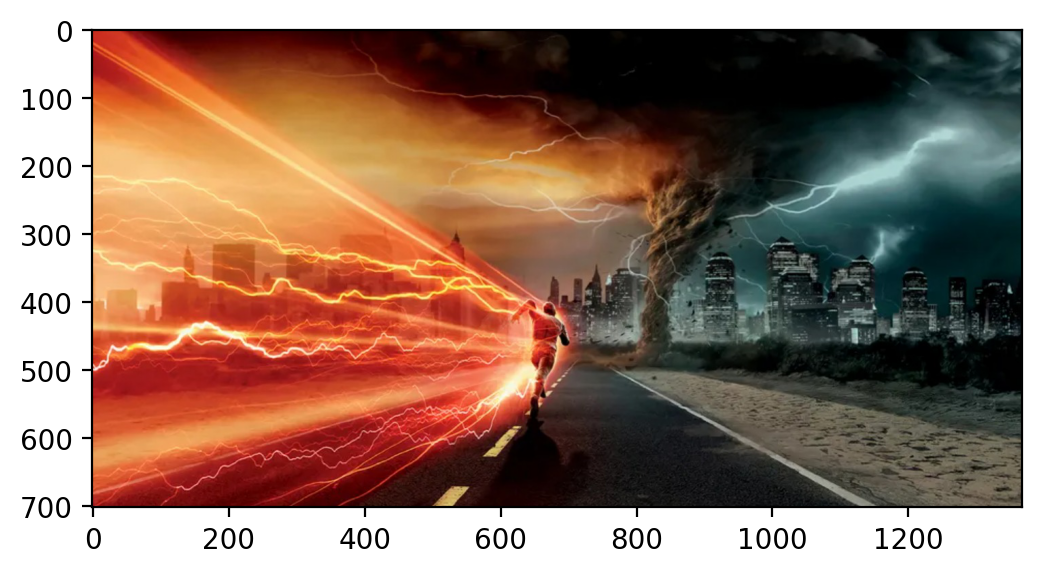

In [5]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

In [6]:
image_as_array.shape

(701, 1368, 3)

In [7]:
h,w,c = image_as_array.shape

In [8]:
h

701

In [9]:
image_as_2d = image_as_array.reshape(h*w,c)

In [10]:
image_as_2d

array([[197,  40,  31],
       [197,  40,  31],
       [198,  41,  32],
       ...,
       [111, 103,  84],
       [104,  96,  77],
       [ 99,  91,  72]], dtype=uint8)

In [11]:
from sklearn.cluster import KMeans

In [30]:
model = KMeans(n_clusters=5)

In [31]:
label = model.fit_predict(image_as_2d)

In [32]:
label

array([3, 3, 1, ..., 2, 2, 2])

In [33]:
model.cluster_centers_

array([[ 22.74855727,  21.62849287,  20.19668764],
       [205.73473992,  92.60145166,  47.68298637],
       [ 90.71158653,  97.64857075,  89.97445965],
       [142.89223519,  35.51639899,  22.87308724],
       [232.09333349, 169.0535652 , 105.72768517]])

In [34]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [35]:
rgb_codes

array([[ 23,  22,  20],
       [206,  93,  48],
       [ 91,  98,  90],
       [143,  36,  23],
       [232, 169, 106]])

In [36]:
quantized_image = np.reshape(rgb_codes[label], (h, w, c))

In [37]:
quantized_image

array([[[143,  36,  23],
        [143,  36,  23],
        [206,  93,  48],
        ...,
        [ 23,  22,  20],
        [ 23,  22,  20],
        [ 23,  22,  20]],

       [[143,  36,  23],
        [206,  93,  48],
        [206,  93,  48],
        ...,
        [ 23,  22,  20],
        [ 23,  22,  20],
        [ 23,  22,  20]],

       [[206,  93,  48],
        [206,  93,  48],
        [206,  93,  48],
        ...,
        [ 23,  22,  20],
        [ 23,  22,  20],
        [ 23,  22,  20]],

       ...,

       [[143,  36,  23],
        [143,  36,  23],
        [143,  36,  23],
        ...,
        [ 91,  98,  90],
        [ 91,  98,  90],
        [ 91,  98,  90]],

       [[143,  36,  23],
        [143,  36,  23],
        [143,  36,  23],
        ...,
        [ 91,  98,  90],
        [ 91,  98,  90],
        [ 91,  98,  90]],

       [[143,  36,  23],
        [143,  36,  23],
        [143,  36,  23],
        ...,
        [ 91,  98,  90],
        [ 91,  98,  90],
        [ 91,  98,  90]]

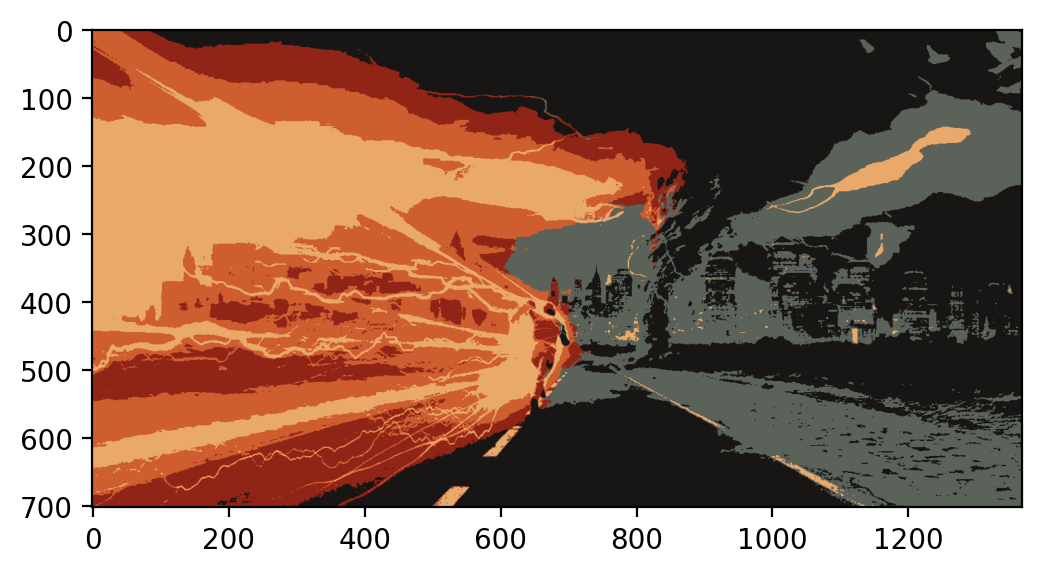

In [38]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)